# What is topic-modelling?
In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words.

The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is. It involves various techniques of dimensionality reduction(mostly non-linear) and unsupervised learning like LDA, SVD, autoencoders etc.

In [1]:
import gensim
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# from ast import literal_eval

In [2]:
df = pd.read_csv(r"..\data files\Pubmed5k_processed.csv", index_col="ArticleID", converters={'Abstract_processed': eval})
df

,Title,Abstract,Abstract_processed,words_count
ArticleID,,,,
34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...,"[coordination, variability, coordination, vari...",1421
34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...,"[clinical, scenario, dynamic, knee, valgus, dy...",1941
34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...,"[methodology, reported, ass, real, world, epid...",1821
34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...,"[outcome, acute, ischemic, stroke, acute, isch...",2358
34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...,"[hearing, loss, child, result, developmental, ...",1339
...,...,...,...,...
34444567,Mind the Differences: How Diagnoses and Hospit...,Integrated care pathway (ICP) is a prevailing ...,"[integrated, care, pathway, integrated, care, ...",1456
34444568,The Ethics of Dying: Deciphering Pandemic-Resu...,The objective of medicine is to provide humans...,"[objective, medicine, provide, human, best, po...",1286
34444569,Research on Adolescents Regarding the Indirect...,This research involved the participation of 30...,"[research, involved, participation, chinese, s...",850


In [3]:
# df = pd.read_csv(r"..\data files\Pubmed5k_processed.csv", index_col="ArticleID")
# df['Abstract_processed'] = df['Abstract_processed'].apply(lambda x:x[1:-1].split(','))
# df.Abstract_processed.iloc[0]

## gensim implementation of LDA

In [4]:
# Create Corpus
texts = df['Abstract_processed'].copy()

# Create Dictionary
id2word = gensim.corpora.Dictionary(documents=texts)

id2word.filter_extremes(no_below=15,no_above=0.45)

# Converting list of documents (corpus) into Document Term Matrix using the dictionary(bow) method
corpus = [id2word.doc2bow(txt) for txt in texts]

In [5]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=7)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [11:40<00:00, 15.92s/it]

Num Topics = 1  has Coherence Value of 0.2663
Num Topics = 2  has Coherence Value of 0.308
Num Topics = 3  has Coherence Value of 0.3101
Num Topics = 4  has Coherence Value of 0.3379
Num Topics = 5  has Coherence Value of 0.3283
Num Topics = 6  has Coherence Value of 0.3504
Num Topics = 7  has Coherence Value of 0.3689
Num Topics = 8  has Coherence Value of 0.371
Num Topics = 9  has Coherence Value of 0.3763
Num Topics = 10  has Coherence Value of 0.3669
Num Topics = 11  has Coherence Value of 0.362
Num Topics = 12  has Coherence Value of 0.3634
Num Topics = 13  has Coherence Value of 0.3772
Num Topics = 14  has Coherence Value of 0.3796
Num Topics = 15  has Coherence Value of 0.3673
Num Topics = 16  has Coherence Value of 0.3706
Num Topics = 17  has Coherence Value of 0.3544
Num Topics = 18  has Coherence Value of 0.3632
Num Topics = 19  has Coherence Value of 0.3643
Num Topics = 20  has Coherence Value of 0.3628
Num Topics = 21  has Coherence Value of 0.3545
Num Topics = 22  has Cohe

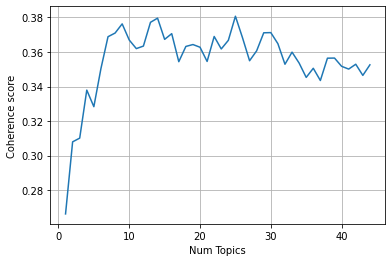

In [6]:
# Can take a long time to run.

start=1; limit=45; step=1;
x = range(start, limit, step)

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, 
                                                        start=start, limit=limit, step=step)
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.grid()
plt.show()

from the figure above best number of topics is 25 or 14, it is just a heuristic step not guaranteed, but we havn't alot of choices

i will select 14 as the correlation values arount 14 is also high, that may be an indicator that this value is more reliable

In [6]:
num_topics = 14

In [7]:
# Select the model and print the topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=7)

In [8]:
# this line to extract the top 3 topics from each document along with their probability
topic_prob = [sorted(lda_model.get_document_topics(crbs, minimum_probability=0), reverse=True, key=lambda x: x[1])[:3] for crbs in corpus]

In [9]:
# this cell to separate each topic/document in one column 
df["topic_1"] = [i[0][0] for i in topic_prob]
df["topic_1_prob"] = [i[0][1] for i in topic_prob]
df["topic_2"] = [i[1][0] for i in topic_prob]
df["topic_2_prob"] = [i[1][1] for i in topic_prob]
df["topic_3"] = [i[2][0] for i in topic_prob]
df["topic_3_prob"] = [i[2][1] for i in topic_prob]


In [10]:
df

,Title,Abstract,Abstract_processed,words_count,topic_1,topic_1_prob,topic_2,topic_2_prob,topic_3,topic_3_prob
ArticleID,,,,,,,,,,
34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...,"[coordination, variability, coordination, vari...",1421,11,0.417006,12,0.414148,0,0.119670
34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...,"[clinical, scenario, dynamic, knee, valgus, dy...",1941,3,0.688884,5,0.149321,1,0.110848
34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...,"[methodology, reported, ass, real, world, epid...",1821,9,0.427810,7,0.392329,10,0.173907
34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...,"[outcome, acute, ischemic, stroke, acute, isch...",2358,7,0.578095,6,0.238241,10,0.130159
34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...,"[hearing, loss, child, result, developmental, ...",1339,1,0.305695,10,0.288019,11,0.207837
...,...,...,...,...,...,...,...,...,...,...
34444567,Mind the Differences: How Diagnoses and Hospit...,Integrated care pathway (ICP) is a prevailing ...,"[integrated, care, pathway, integrated, care, ...",1456,0,0.333623,11,0.319064,8,0.265680
34444568,The Ethics of Dying: Deciphering Pandemic-Resu...,The objective of medicine is to provide humans...,"[objective, medicine, provide, human, best, po...",1286,3,0.511848,0,0.250130,11,0.229289
34444569,Research on Adolescents Regarding the Indirect...,This research involved the participation of 30...,"[research, involved, participation, chinese, s...",850,11,0.652734,1,0.335679,8,0.000966


In [11]:
def topics_words():
    """ this function to return dictionary with all topics [0-13] as a key and the list of tuples of word and it's probability
    Return:
    {topic_number:[(word_1_that represent that topic, probability that this word_1 represent that topic), 
                   (word_2_that represent that topic, probability that this word_2 represent that topic),    
                   .
                   .
                   .
                   .
                   ]}
    """
    topics = {}
    model_topics = lda_model.show_topics(formatted=False, num_topics=num_topics)

    for idx, val in enumerate(model_topics):
        topics[idx] = val[1]
    
    return topics

tpcs = topics_words()        
pprint(tpcs)

########################################## Alternative code semi equivalent ################################    
# all_topics = lda_model.print_topics(num_topics=num_topics)        #14 topic
# pprint(all_topics)

{0: [('health', 0.020937957),
     ('data', 0.00864561),
     ('intervention', 0.0074067237),
     ('research', 0.0069800285),
     ('based', 0.006839498),
     ('analysis', 0.0059283073),
     ('social', 0.005901169),
     ('model', 0.005264011),
     ('physical', 0.005093473),
     ('community', 0.0047863387)],
 1: [('p', 0.011579314),
     ('child', 0.011071048),
     ('based', 0.0065911966),
     ('effect', 0.0058115143),
     ('method', 0.005358318),
     ('result', 0.005201619),
     ('network', 0.0050637764),
     ('time', 0.0048017027),
     ('data', 0.0046625715),
     ('brain', 0.0046147727)],
 2: [('cell', 0.024720734),
     ('expression', 0.011675253),
     ('gene', 0.009167323),
     ('cancer', 0.007773901),
     ('c', 0.0069024954),
     ('analysis', 0.006805736),
     ('stress', 0.0063780653),
     ('soil', 0.006193356),
     ('tumor', 0.006077005),
     ('patient', 0.005246665)],
 3: [('patient', 0.016675515),
     ('health', 0.011553523),
     ('disease', 0.009144833),

i can replace the number of the topic by the words represents that topic, but that will make the view not fine, any way i will write the code then comment it

In [14]:
df["topic_1_words"] = df["topic_1"].map(tpcs)
df["topic_2_words"] = df["topic_2"].map(tpcs)
df["topic_3_words"] = df["topic_3"].map(tpcs)

In [15]:
df

,Title,Abstract,Abstract_processed,words_count,topic_1,topic_1_prob,topic_2,topic_2_prob,topic_3,topic_3_prob,topic_1_words,topic_2_words,topic_3_words
ArticleID,,,,,,,,,,,,,
34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...,"[coordination, variability, coordination, vari...",1421,11,0.417006,12,0.414148,0,0.119670,"[(health, 0.008957788), (woman, 0.0075162924),...","[(change, 0.008032132), (effect, 0.00800472), ...","[(health, 0.020937957), (data, 0.00864561), (i..."
34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...,"[clinical, scenario, dynamic, knee, valgus, dy...",1941,3,0.688884,5,0.149321,1,0.110848,"[(patient, 0.016675515), (health, 0.011553523)...","[(cell, 0.015843935), (human, 0.005490977), (t...","[(p, 0.011579314), (child, 0.011071048), (base..."
34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...,"[methodology, reported, ass, real, world, epid...",1821,9,0.427810,7,0.392329,10,0.173907,"[(patient, 0.012658345), (group, 0.008774831),...","[(patient, 0.029914001), (disease, 0.009574381...","[(patient, 0.017943399), (risk, 0.016412973), ..."
34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...,"[outcome, acute, ischemic, stroke, acute, isch...",2358,7,0.578095,6,0.238241,10,0.130159,"[(patient, 0.029914001), (disease, 0.009574381...","[(patient, 0.026020983), (disease, 0.012993779...","[(patient, 0.017943399), (risk, 0.016412973), ..."
34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...,"[hearing, loss, child, result, developmental, ...",1339,1,0.305695,10,0.288019,11,0.207837,"[(p, 0.011579314), (child, 0.011071048), (base...","[(patient, 0.017943399), (risk, 0.016412973), ...","[(health, 0.008957788), (woman, 0.0075162924),..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34444567,Mind the Differences: How Diagnoses and Hospit...,Integrated care pathway (ICP) is a prevailing ...,"[integrated, care, pathway, integrated, care, ...",1456,0,0.333623,11,0.319064,8,0.265680,"[(health, 0.020937957), (data, 0.00864561), (i...","[(health, 0.008957788), (woman, 0.0075162924),...","[(protein, 0.020765651), (gene, 0.0121917445),..."
34444568,The Ethics of Dying: Deciphering Pandemic-Resu...,The objective of medicine is to provide humans...,"[objective, medicine, provide, human, best, po...",1286,3,0.511848,0,0.250130,11,0.229289,"[(patient, 0.016675515), (health, 0.011553523)...","[(health, 0.020937957), (data, 0.00864561), (i...","[(health, 0.008957788), (woman, 0.0075162924),..."
34444569,Research on Adolescents Regarding the Indirect...,This research involved the participation of 30...,"[research, involved, participation, chinese, s...",850,11,0.652734,1,0.335679,8,0.000966,"[(health, 0.008957788), (woman, 0.0075162924),...","[(p, 0.011579314), (child, 0.011071048), (base...","[(protein, 0.020765651), (gene, 0.0121917445),..."


In [350]:
# # Visualize the topics-keywords
# import pyLDAvis.sklearn
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.sklearn.prepare(lda_model, corpus, id2word)
# vis

## scikit-learn implementation of LDA

In [11]:
# Creating a vectorizer
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform([" ".join(w) for w in texts])

lda = LatentDirichletAllocation(n_components=num_topics, learning_method="online", random_state=7)
x = lda.fit_transform(data_vectorized)
vectorizer.get_feature_names_out(), lda.components_, lda.doc_topic_prior_ #theta

(array(['aa', 'aaa', 'aachen', ..., 'área', 'åsberg', 'île'], dtype=object),
 array([[ 0.07161698,  0.07143249,  2.469042  , ...,  0.07143018,
          0.07145212,  0.07144612],
        [ 0.07143052,  0.0714295 ,  0.07142953, ...,  0.07143022,
          0.07144453,  0.85335024],
        [ 0.0714302 ,  0.07142941,  0.07142958, ...,  0.0714294 ,
          0.07142967,  0.07142962],
        ...,
        [12.78744256,  1.36226511,  0.07142962, ...,  0.07142953,
          0.07146627,  0.07143182],
        [ 0.07142967,  0.07142949,  0.07142945, ...,  0.07145637,
          0.07142963,  0.07146314],
        [ 0.07142955,  0.07142958,  0.07142964, ...,  0.07142945,
          0.07142944,  0.07142959]]),
 0.07142857142857142)

#### suggestions for improving this solution:-
- add bigram & trigram 
- use transformer based models
- use Hierarchical Drichlet Process(HDP) MODEL to find the best number of topics

### This script written at April-2022 by Ahmad salama
- salama4ai@gmail.com
- www.linkedin.com/in/salama4ai